In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import control
from numpy import sin, cos, tan, pi
from control import TransferFunction as TF

In [2]:
import txt_mixin

In [3]:
plt.rcParams['font.size'] = 14

In [4]:
import py_block_diagram

In [5]:
import importlib

In [6]:
importlib.reload(py_block_diagram)

<module 'py_block_diagram' from '/home/ryanwkrauss/git/py_block_diagram/py_block_diagram/__init__.py'>

In [7]:
import py_block_diagram as pybd

## System Description

In [8]:
U = pybd.pulse_input(on_time=0.1,off_time=0.5,amp=200)

In [9]:
U.place_absolute(0,0)

In [10]:
diff_motors = pybd.custom_actuator("dual_motors","two_motors_actuator","&motors")

In [11]:
pend_enc = pybd.custom_sensor("pend_enc","pendulum_encoder","")

In [12]:
G = pybd.plant(pend_enc,diff_motors,"Robot",U)

In [13]:
G.place_relative(U,"right",5)

In [14]:
block_list = [U,G]

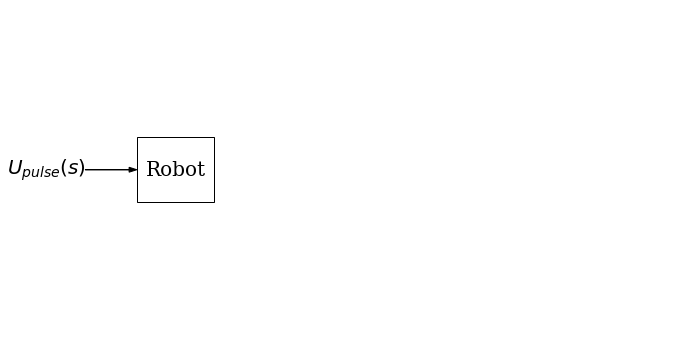

In [15]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
mysys = pybd.block_diagram(block_list,ax)
mysys.draw()
plt.xlim([-1,25])
plt.ylim([-5,5])
mysys.axis_off()

## Codegen Test

In [16]:
msg = "Cart Pendulum Autogen 1: OL Pulse"

In [17]:
mysys.welcome_msg = msg

In [18]:
ls *.ino

cart_pendulum_template1_vib_only.ino


In [19]:
template_fn = "cart_pendulum_template1_vib_only.ino"

In [20]:
mysys.generate_arduino_code("cart_pendulum_autogen_1_siso_ol_pulse", template_fn)

block: <py_block_diagram.pulse_input object at 0x790b5ae76940>
block: <py_block_diagram.plant object at 0x790b5ae5e7f0>


In [21]:
fullspeed = 16000000.0

In [22]:
prescaler = 256

In [23]:
other = 200

In [24]:
fullspeed/prescaler/(other+1)

310.9452736318408

In [25]:
1/(_24)

0.003216

In [26]:
goal = 500

In [27]:
fullspeed/prescaler/goal

125.0